In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# 1. Load and Prepare Data:
#   - Assuming your synthetic data is in 'synthData.csv'
#   - Select relevant features for clustering (e.g., temperature, rainfall, etc.)
data = pd.read_csv("Data2.csv")  # Load the CSV file
features = [
    "Min Temperature (°C)",
    "Max Temperature (°C)",
    "Min Rainfall (mm)",
    "Max Rainfall (mm)",
    "Crop Yield (tons/ha)",
]
X = data[features]  # Select the features for clustering

In [3]:
# 2. Standardize Features:
#   - K-Means is sensitive to scale, so standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

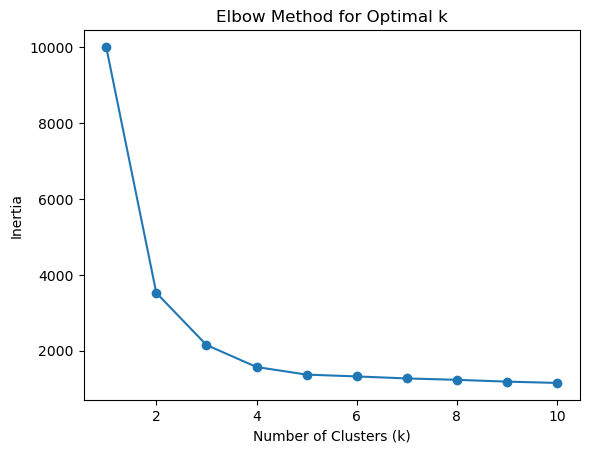

In [4]:
# 3. Determine Optimal Number of Clusters (Elbow Method):
#   - Find the "elbow" point in the inertia plot to suggest the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [5]:
# 4. Fit K-Means Model:
#   - Based on the elbow method, choose an appropriate k
k = 4  # Choose k based on the elbow method result
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [6]:
# 5. Evaluate Clustering (Silhouette Score):
#   - Get a measure of how well the clusters are separated
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3956051635096259


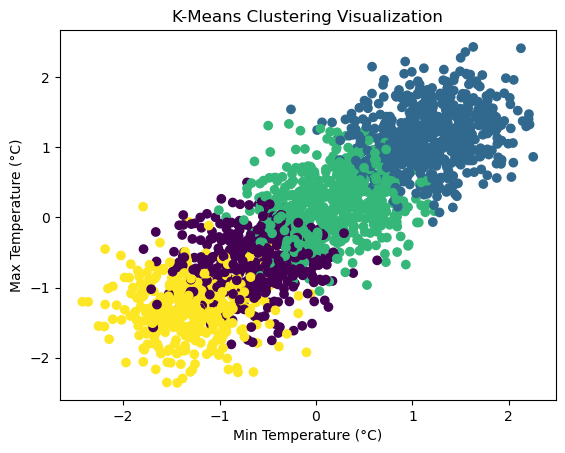

In [7]:
# 6. Visualize Clusters:
#   - Choose two features for visualization (e.g., temperature and rainfall)
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap="viridis"
)  # Customize features as needed
plt.title("K-Means Clustering Visualization")
plt.xlabel("Min Temperature (°C)")
plt.ylabel("Max Temperature (°C)")  # Customize labels as needed
plt.show()

In [8]:
# 7. Assign New Farmer Data:
#   - Get new farmer features and scale them
new_farmer_data = pd.DataFrame(
    [[20, 30, 1200, 1500, 5]], columns=features
)  # Example new farmer data
new_farmer_data_scaled = scaler.transform(new_farmer_data)
cluster_prediction = kmeans.predict(new_farmer_data_scaled)

In [9]:
# 8. Display Prediction:
print(
    f"Predicted Cluster for New Farmer: {cluster_prediction[0]}"
)  # Get the cluster label for the new farmer

Predicted Cluster for New Farmer: 0


In [10]:
# 9. (Optional) Add Region Labels to Clusters:
#   - To associate clusters with regions, add a "Region" column to the original data
data["Cluster"] = kmeans.labels_
cluster_regions = data.groupby("Cluster")["Region"].unique()
print("Cluster to Region Mapping:")
for cluster, region in cluster_regions.items():
    print(f"Cluster {cluster}: {region}")

Cluster to Region Mapping:
Cluster 0: ['NR II' 'NR III' 'NR I']
Cluster 1: ['NR IV' 'NR V']
Cluster 2: ['NR III' 'NR IV' 'NR II']
Cluster 3: ['NR I' 'NR II']


In [11]:
import joblib

# Save the model
joblib.dump(kmeans, 'kmean_Model.pkl')

['kmean_Model.pkl']